### 🏡California Housing Price Prediction 


* This is a project for the prediction of California house prices. I have put the youtube link for you to follow through. 

**The data set used for this project is sourced from Kaggle 
https://www.kaggle.com/camnugent/california-housing-prices**

**The notebook takes you through the following stages:**

1. Exploratory Data Analysis of the data set to analyse the existing data on the pricing of houses based on the house capacity.
2. Dividing the data set into trained data and test data and using the test data for prediction.
3. Using performance metrics to find the error rate and the accuracy level of the model.
4. Using various regression models to find the most efficient model for this project.




### Importing the necessary classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Importing the csv file

housing_data = pd.read_csv('real_estate/housing.csv')

### Performing explaratory data analysis

In [3]:
# Check the general state of the data

housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Check statistical description of data
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Check if there is any missing data
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

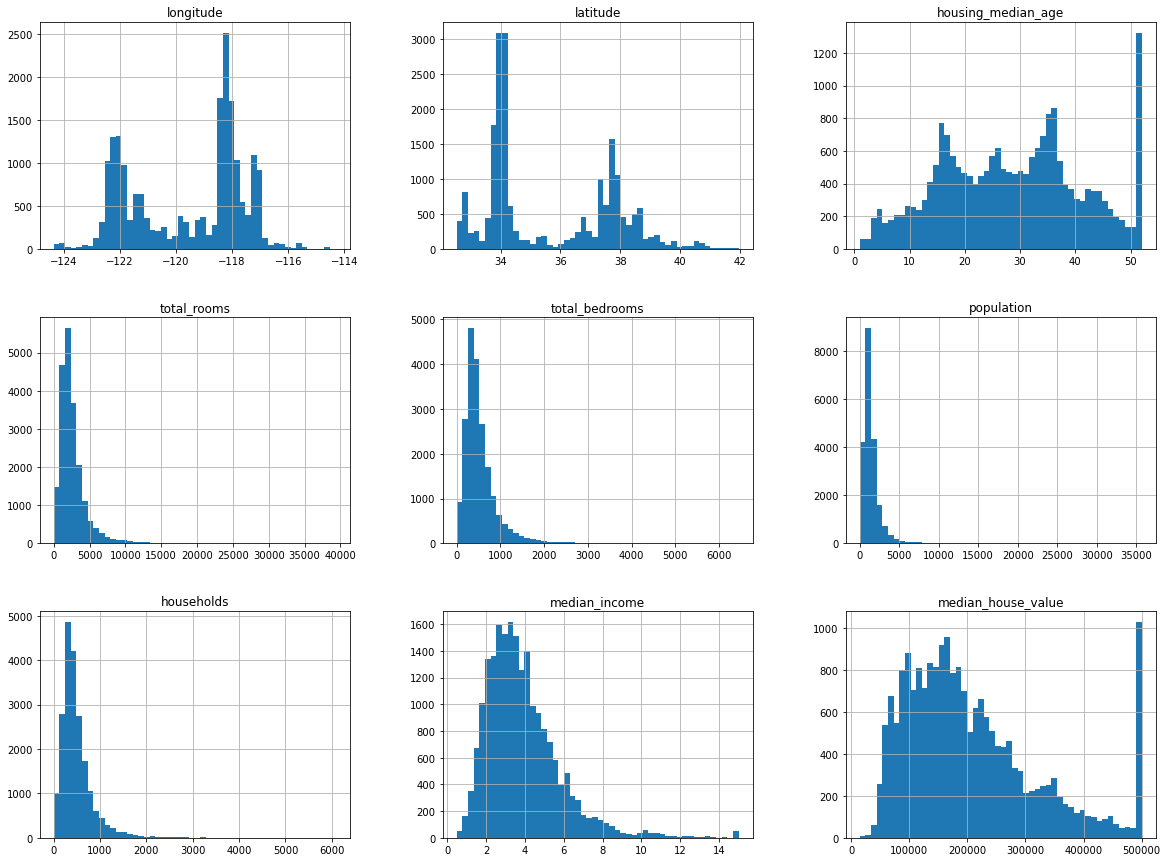

In [6]:
# check the data distribution

housing_data.hist(figsize=(20,15),bins=50);

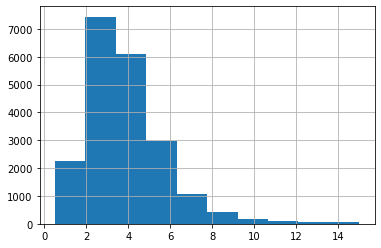

In [7]:
# Zoning into the housing meadian income

housing_data['median_income'].hist();

### Using stratified sampling

In [8]:
# Dividing the income category into groups

housing_data['income_group'] = np.ceil(housing_data['median_income']/1.5)

#Putting everything above 5th group as 5th group

housing_data['income_group'].where(housing_data['income_group']<5,other=5.0, inplace=True)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,
                               test_size = 0.2, 
                               random_state = 29 )

for train_index, test_index in split.split(housing_data,housing_data['income_group']):
    strat_training_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [10]:
list(split.split(housing_data,housing_data['income_group']))

[(array([ 7771,  9352, 18657, ..., 17949,  2104, 20194], dtype=int64),
  array([ 4701, 12506,  9499, ..., 14810, 13449,  1345], dtype=int64))]

In [11]:
# Checking income distribution on a per income_group basis
housing_data['income_group'].value_counts()/len(housing_data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_group, dtype: float64

In [12]:
# Check the distribution in the strat_training_set
strat_training_set['income_group'].value_counts()/len(strat_training_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_group, dtype: float64

**As seen above the predictions are maintained using Stratified Sampling**

[Why startified sampling?]: Because the features are few and the size of data is small we adopt the stratified sampling technique. In this way we will not miss out on any class.

### Experimenting with random sampling

In [13]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data,
                                       test_size=0.2, 
                                       random_state=29)


In [14]:
def income_group_proportion(data):
    return data['income_group'].value_counts()/len(data)

comparing_props = pd.DataFrame({
    'Overall propotion':income_group_proportion(housing_data),
    'Random proportion':income_group_proportion(test_set),
    'Stratified proportion': income_group_proportion(strat_test_set)
}).sort_index()

comparing_props['random %error'] = 100 * comparing_props['Random proportion']/comparing_props['Overall propotion']-100
comparing_props['stratified error'] = 100 * comparing_props['Stratified proportion']/comparing_props['Overall propotion']-100

In [15]:
comparing_props

,Overall propotion,Random proportion,Stratified proportion,random %error,stratified error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


**The random sampling method has a high error and has missed the class 1 income group. This is solved by using the stratified sampling method.**

### Creating vizualizations

In [16]:
# Removing the income group
for items in  (strat_training_set,strat_test_set):
        items.drop('income_group',
                  axis=1,
                  inplace=True)

In [17]:
# Creating a copy of the training data
housing = strat_training_set.copy()

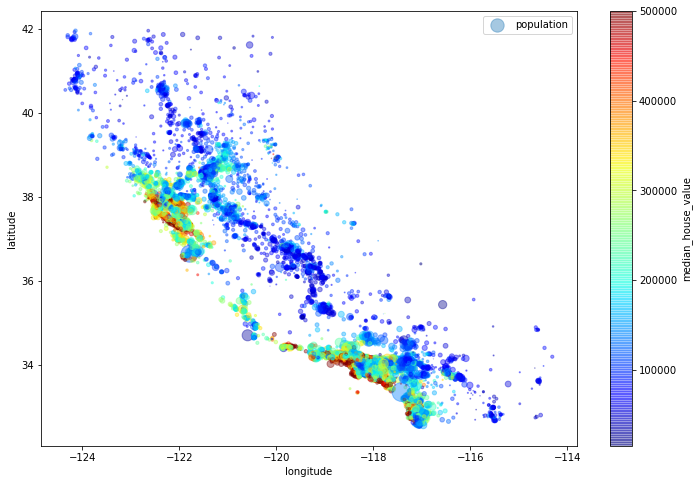

In [18]:
housing.plot(kind='scatter',
            x = 'longitude',
            y = 'latitude',
            alpha = 0.4,
            s=housing['population']/100,
            label ='population',
            figsize = (12,8),
            c='median_house_value',
            cmap=plt.get_cmap('jet'),
            sharex=False);

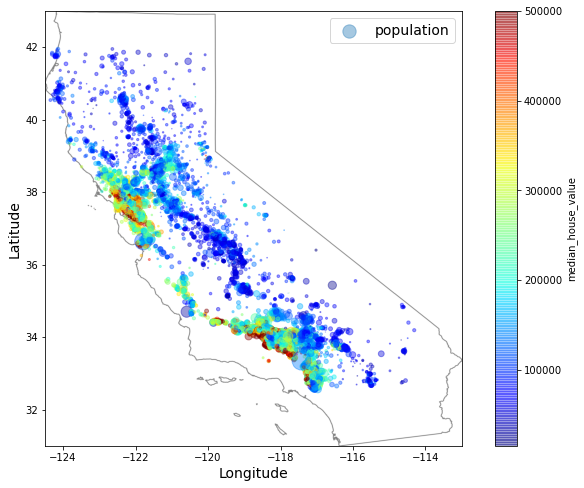

In [19]:
ax = housing.plot(kind='scatter',
            x = 'longitude',
            y = 'latitude',
            alpha = 0.4,
            s=housing['population']/100,
            label ='population',
            figsize = (12,8),
            c='median_house_value',
            cmap=plt.get_cmap('jet'),
            sharex=False);

image = plt.imread('california.png')

plt.imshow(image,
           extent = [-124.5,-113,31,43],
           alpha = 0.5,
           cmap = plt.get_cmap('jet'),
          )

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)

plt.legend(fontsize=14)

plt.show()

**Clearly the expensive houses are close to the sea**

## Checking out the correlation

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

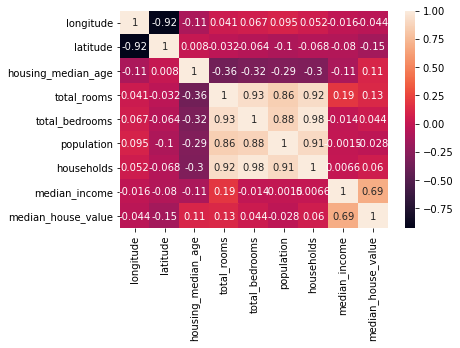

In [21]:
import seaborn as sns

sns.heatmap(corr_matrix,
        annot=True);


In [22]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924722,-0.105995,0.040909,0.067200,0.094516,0.051637,-0.016472,-0.043780
latitude,-0.924722,1.000000,0.007958,-0.031951,-0.064306,-0.104614,-0.067934,-0.079775,-0.146422
housing_median_age,-0.105995,0.007958,1.000000,-0.361488,-0.319775,-0.293487,-0.301376,-0.112323,0.108483
total_rooms,0.040909,-0.031951,-0.361488,1.000000,0.930315,0.855548,0.918100,0.189669,0.127306
total_bedrooms,0.067200,-0.064306,-0.319775,0.930315,1.000000,0.877211,0.979905,-0.014001,0.043921
population,0.094516,-0.104614,-0.293487,0.855548,0.877211,1.000000,0.906144,-0.001476,-0.028341
households,0.051637,-0.067934,-0.301376,0.918100,0.979905,0.906144,1.000000,0.006599,0.060084
median_income,-0.016472,-0.079775,-0.112323,0.189669,-0.014001,-0.001476,0.006599,1.000000,0.691071
median_house_value,-0.043780,-0.146422,0.108483,0.127306,0.043921,-0.028341,0.060084,0.691071,1.000000


### Feature Engineering

In [23]:
housing['bedrooms per room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population per household'] = housing['population']/housing['households']
housing['rooms per household'] = housing['total_rooms']/housing['households']


In [24]:
corr_matrix = housing.corr()
# sns.heatmap(corr_matrix,
#            annot= True)
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.691071
rooms per household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population per household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms per room          -0.253572
Name: median_house_value, dtype: float64

**The new 'bedrooms per room ' feature is negatively correlated to the median_house_value. This means
the houses with lower bedroom/room ratio will tend to be more expensive.**

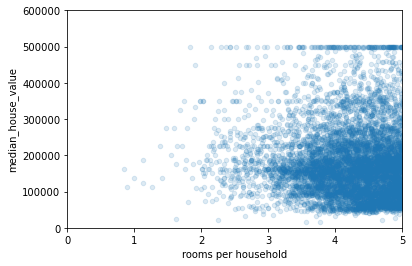

In [25]:
# Using a scatter diagram to see the correlation between rooms per household and median_house_value

housing.plot(kind='scatter',
            x='rooms per household',
            y='median_house_value',
            alpha=0.15)
plt.axis([0,5,0,600000]);

In [26]:
housing.describe(include=[np.number])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms per room,population per household,rooms per household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,3.103875,5.434516
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,11.603193,2.520743
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,2.433980,4.443478
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,2.817596,5.230221
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,3.273248,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


## Preparing the dataset for ML algorithms

In [27]:
housing = strat_training_set.drop('median_house_value', axis=1)
housing_labels = strat_training_set['median_house_value']

### Method 1:

**Using pandas to fill in the missing data values**

In [28]:
# Checking the missing values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [29]:
# Verifying rows with missing data
missing_data_rows = housing[ housing.isna().any(axis=1)]
missing_data_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,NaN,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,NaN,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,NaN,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,NaN,966.0,292.0,3.0694,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9571,-120.61,37.36,16.0,638.0,NaN,380.0,132.0,1.9135,INLAND
3482,-118.45,34.30,27.0,2676.0,NaN,2661.0,623.0,4.3047,<1H OCEAN
19060,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY


In [30]:
# Replacing the missing rows with median example

median = housing['total_bedrooms'].median()
missing_data_rows['total_bedrooms'].fillna(median, inplace=True)
missing_data_rows

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9571,-120.61,37.36,16.0,638.0,433.0,380.0,132.0,1.9135,INLAND
3482,-118.45,34.30,27.0,2676.0,433.0,2661.0,623.0,4.3047,<1H OCEAN
19060,-122.41,38.16,37.0,1549.0,433.0,863.0,275.0,2.7457,NEAR BAY
341,-122.17,37.75,38.0,992.0,433.0,732.0,259.0,1.6196,NEAR BAY


### Method 2: 

**Using the scikitlearn Imputer class to fill in missing values**

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')



In [32]:
# Dropping the column with categorical data

housing_modified = housing.drop('ocean_proximity', 
                                axis=1)
imputer.fit(housing_modified)

SimpleImputer(strategy='median')

In [33]:
housing_modified.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
dtype: int64

In [34]:
# Checking computed medians for each attribute in our data_set
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

**Using the imputer created above, we transform the dataset by replacing missing values by the median**

In [35]:
X = imputer.transform(housing_modified)

In [36]:
housing_tr = pd.DataFrame(X,columns=housing_modified.columns)

In [37]:
# Check if there are any missing values
housing_tr[housing_tr.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [38]:
housing_tr.head(), housing_tr.tail()

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -118.09     33.92                35.0       1994.0           419.0   
 1    -122.57     37.96                52.0       3458.0           468.0   
 2    -121.96     36.97                23.0       4324.0          1034.0   
 3    -118.28     34.02                52.0        281.0           103.0   
 4    -116.50     33.81                26.0       5032.0          1229.0   
 
    population  households  median_income  
 0      1491.0       428.0         3.7383  
 1      1449.0       471.0         9.1834  
 2      1844.0       875.0         3.0777  
 3       470.0        96.0         1.9375  
 4      3086.0      1183.0         2.5399  ,
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 16507    -117.12     32.95                 4.0       9018.0          1572.0   
 16508    -115.55     32.79                22.0        565.0           162.0   
 16509    -121.96     37.34          

**Dealing with categorical data**

In [39]:
housing_cat = housing['ocean_proximity']
housing_cat.value_counts()

<1H OCEAN     7308
INLAND        5266
NEAR OCEAN    2090
NEAR BAY      1843
ISLAND           5
Name: ocean_proximity, dtype: int64

### Method 1:
**Using pandas factorize() method.**

In [40]:
#factorize() method converts string objects into categorical features

housing_cat_encoded, housing_categories = housing_cat.factorize()  

In [41]:
# Checking the codes
housing_cat_encoded[:12]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2, 0, 3], dtype=int64)

In [42]:
# Checking the uniques
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

### Method 2:
**Using the scikitlearn One Hot Encoder**


In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

housing_cat_onehot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))

In [44]:
# Viewing the sparse matrix
housing_cat_onehot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
# Converting the sparse matrix to an nd-array
housing_cat_onehot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

In [46]:
#Checking the index of the columns
missing_data_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9571,-120.61,37.36,16.0,638.0,433.0,380.0,132.0,1.9135,INLAND
3482,-118.45,34.30,27.0,2676.0,433.0,2661.0,623.0,4.3047,<1H OCEAN
19060,-122.41,38.16,37.0,1549.0,433.0,863.0,275.0,2.7457,NEAR BAY
341,-122.17,37.75,38.0,992.0,433.0,732.0,259.0,1.6196,NEAR BAY


### Custom Transformations 

In [47]:
from sklearn.base import BaseEstimator,TransformerMixin

# Column indexes
rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self,X,y = None):
        return self # Nothing to do here
    
    def transform(self,X,y = None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,population_per_household]
    

In [48]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)

In [49]:
housing_extra_attributes = pd.DataFrame(housing_extra_attributes, 
                                        columns=list(housing.columns)+['rooms_per_household',
                                                                      'population_per_household',
                                                                      ])
housing_extra_attributes.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


### Setting up a Pipeline for all the preprocessing 

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creating a numeric pipeline
numeric_pipeline = Pipeline([('Imputer',SimpleImputer(strategy='median')),
                            ('attribs_adder',CombinedAttributesAdder()),
                            ('std_scaler',StandardScaler())
                            ])
# Using the pipeline to fit the numeric columns
housing_numeric_tr = numeric_pipeline.fit_transform(housing_modified)
housing_numeric_tr


array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [51]:
class DataSeparator(BaseEstimator,TransformerMixin):
    
    def __init__(self,attributes_names):
        self.attributes_names = attributes_names
        
    def fit(self,X,y=None):
        return self# does not do anything
    
    def transform(self,X,y = None):
        return X[self.attributes_names].values

In [52]:
# Complete pipeline

numerical_attribs = list(housing_modified.columns)
categorical_attribs = ['ocean_proximity']

numeric_pipeline = Pipeline([('selector',DataSeparator(numerical_attribs)),
                            ('Imputer',SimpleImputer(strategy='median')),
                            ('attribs_adder',CombinedAttributesAdder()),
                            ('std_scaler',StandardScaler())])

categorical_pipeline = Pipeline([('selector',DataSeparator(categorical_attribs)),
                                 ('cat_encoder',OneHotEncoder(sparse=False))])


### Now to Create a full pipeline that combines categorical and numerical pipeline

In [53]:


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline',numeric_pipeline),
                                              ('categorical_pipeline',categorical_pipeline)
                                              ])

In [54]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

## Selecting and training the Model

###  Trial 1: Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [56]:
# trying the full pipeline on a number of training instances

trial_data = housing.iloc[:5]
trial_labels = housing_labels.iloc[:5]

trail_data_prepared = full_pipeline.transform(trial_data)

print('Predictions: ',lin_reg.predict(trail_data_prepared))
print('Actual labels: ',list(trial_labels))


Predictions:  [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual labels:  [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [57]:
from sklearn.metrics import mean_squared_error
housing_preds = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels,housing_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

### Trial 2: Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,
                         housing_prepared,
                         housing_labels,
                         cv=10,
                         scoring='neg_mean_squared_error')

tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print('scores:',scores)
    print('mean: ',scores.mean())
    print('std_deviation',scores.std())

### Decison tree score

In [62]:
display_scores(tree_rmse_scores)

scores: [70574.52021736 68703.30032267 68316.35483647 72200.84747883
 69636.12747667 68245.02941973 72051.9049535  69603.54641519
 67999.12708342 69981.63230368]
mean:  69731.23905075222
std_deviation 1433.5694559806798


### Linear regression score

In [63]:
lin_scores = cross_val_score(lin_reg,
                             housing_prepared,
                             housing_labels, 
                             cv=10, 
                             scoring='neg_mean_squared_error')
lin_rmse = np.sqrt(-lin_scores)

In [64]:
display_scores(lin_rmse)

scores: [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean:  68243.17261737354
std_deviation 2500.726216291978


### Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [66]:
housing_preds = rf_reg.predict(housing_prepared)

In [67]:
rf_scores = cross_val_score(rf_reg,
                             housing_prepared,
                             housing_labels, 
                             cv=10, 
                             scoring='neg_mean_squared_error')
rf_reg_scores = np.sqrt(-rf_scores)

In [68]:
display_scores(rf_reg_scores)

scores: [48821.60032642 49425.60850863 48003.9498419  49179.41854351
 49142.89172088 49803.08688245 48588.42964722 49243.37568656
 48344.13204782 52854.78226849]
mean:  49340.72754738738
std_deviation 1275.1400289700027


### Fine Tuning the model




In [69]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 40, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 40, num = 3)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':[True]
             }

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, 
                           param_grid,
                           cv = 5,
                           scoring='neg_mean_squared_error',
                           verbose=2)

In [70]:
grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_fea

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, m

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40, total=   3.7s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40, total=   3.8s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40, total=   4.0s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40, total=   3.8s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_feat

[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   1.6s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_feat

[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   2.3s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   2.3s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_fea

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20, total=   0.6s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20, total=   0.6s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_feat

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30, total=   0.8s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30, total=   0.8s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30, total=   0.7s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30, total=   0.8s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_feat

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.9s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.9s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   1.1s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.9s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, m

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30, total=   2.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30, total=   2.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30, total=   2.8s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30, total=   2.6s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_feat

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40, total=   3.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40, total=   3.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40, total=   3.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40, total=   3.4s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_feat

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   1.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   1.6s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   1.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_feat

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   2.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   2.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   2.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   2.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, 

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40, total=   1.1s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40, total=   1.0s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40, total=   1.1s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40, total=   1.0s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_fea

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_feat

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_feat

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.9s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.9s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.9s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.8s


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 20.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 25, 40],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 40]},
             scoring='neg_mean_squared_error', verbose=2)

In [71]:
# Check the best parameters for the grid search
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [72]:
# Check the best estimator
grid_search.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=40)

In [73]:
# Check the different results
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

53136.43870758384 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
53071.17118701883 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
52873.96828722639 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
53439.061207405895 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
52831.15284916603 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}
52923.10664898709 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
53469.74836875068 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 

### Saving the model results with different parameters

In [74]:
pd.DataFrame(grid_search.cv_results_).to_csv('California_model_summary.csv')

### Note:
**If you are not sure what parameters to use try RandomizedSearchCV**

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 40, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 3)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }



# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=29)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(rf, 
                               param_distributions = random_grid,
                               scoring = "neg_mean_squared_error",
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2,
                               random_state=29
                               )
# Fit the random search model
rf_random.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=1

[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15, total=   3.0s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15, total=   3.0s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15, total=   3.0s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=15, total=   2.9s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.5s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=29),
                   param_distributions={'max_depth': [10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [3, 5, 7],
                                        'n_estimators': [20, 30, 40]},
                   random_state=29, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
# Check the best parameters
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [78]:
cvres = rf_random.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50246.78272429619 {'n_estimators': 40, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
50201.395230017486 {'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
53404.718768887564 {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
50662.46676631646 {'n_estimators': 30, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
50748.58380129301 {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}
53477.10795541139 {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
50662.46676631646 {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
52842.3777834608 {'n_estimators': 40, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 

In [79]:
# Checkimg out the feature importances

feature_importances = rf_random.best_estimator_.feature_importances_
feature_importances

array([9.77159834e-02, 7.96337338e-02, 3.88229036e-02, 2.00710759e-02,
       1.83199543e-02, 2.17617484e-02, 1.76077329e-02, 2.55800616e-01,
       7.64266515e-02, 9.31274341e-02, 1.09342108e-01, 2.75800991e-02,
       1.21684971e-01, 1.56443869e-04, 7.18368596e-03, 1.47648579e-02])

In [80]:
# Combining the feature importance with the attribute.

for feature,attrib in zip(housing_extra_attributes,feature_importances):
    print ('Feature: ',feature,' Importance value: ' ,attrib.round(2))

Feature:  longitude  Importance value:  0.1
Feature:  latitude  Importance value:  0.08
Feature:  housing_median_age  Importance value:  0.04
Feature:  total_rooms  Importance value:  0.02
Feature:  total_bedrooms  Importance value:  0.02
Feature:  population  Importance value:  0.02
Feature:  households  Importance value:  0.02
Feature:  median_income  Importance value:  0.26
Feature:  ocean_proximity  Importance value:  0.08
Feature:  rooms_per_household  Importance value:  0.09
Feature:  population_per_household  Importance value:  0.11


In [81]:
importances_df = pd.DataFrame(zip(housing_extra_attributes,feature_importances),
            columns=['Feature', 'Importance'])
importances_df 

,Feature,Importance
0,longitude,0.097716
1,latitude,0.079634
2,housing_median_age,0.038823
3,total_rooms,0.020071
4,total_bedrooms,0.018320
5,population,0.021762
6,households,0.017608
7,median_income,0.255801
8,ocean_proximity,0.076427
9,rooms_per_household,0.093127


In [82]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = categorical_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.2558006162234582, 'median_income'),
 (0.12168497088931411, 'INLAND'),
 (0.10934210809660481, 'bedrooms_per_room'),
 (0.09771598344561376, 'longitude'),
 (0.09312743410620823, 'population_per_household'),
 (0.0796337337949883, 'latitude'),
 (0.07642665152424866, 'rooms_per_household'),
 (0.03882290357160258, 'housing_median_age'),
 (0.0275800990550411, '<1H OCEAN'),
 (0.021761748406305813, 'population'),
 (0.020071075899308427, 'total_rooms'),
 (0.01831995428353834, 'total_bedrooms'),
 (0.0176077329236933, 'households'),
 (0.014764857946894729, 'NEAR OCEAN'),
 (0.007183685964508065, 'NEAR BAY'),
 (0.00015644386867164536, 'ISLAND')]

In [83]:
pd.DataFrame(sorted(zip(feature_importances,attributes), reverse=True),
            columns=['Importance','Feature'])

,Importance,Feature
0,0.255801,median_income
1,0.121685,INLAND
2,0.109342,bedrooms_per_room
3,0.097716,longitude
4,0.093127,population_per_household
5,0.079634,latitude
6,0.076427,rooms_per_household
7,0.038823,housing_median_age
8,0.027580,<1H OCEAN
9,0.021762,population


### Final model block

In [84]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)